In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Question 3

The function below carries out TLS or Total Linear Regression. We will need to use this as the errors in x and y are both equally uncertain. 

In [2]:
def TotalLinearRegression(x, y, xtitle, ytitle, title):
    xaxis = np.linspace(np.min(x),np.max(x)+1,2*len(x))
    xmean = np.mean(x)
    ymean = np.mean(y)
    rho = np.square(np.std(x)/np.std(y))

    S_xy = np.dot(x-xmean, y-ymean)
    S_xx = np.dot(x-xmean, x-xmean)
    S_yy = np.dot(y-ymean, y-ymean)

    
    slope = ((S_yy - rho*S_xx) + np.sqrt((S_yy - rho*S_xx)**2 + 4*rho*(S_xy**2)))/(2*S_xy)
    intercept = ymean - slope*xmean
    plt.scatter(x, y, c='r', marker='.', label="Measured Data")
    plt.plot(xaxis, slope*xaxis + intercept, label="TLS")
    plt.xlabel(xtitle)
    plt.ylabel(ytitle)
    plt.legend()
    plt.title(title)

    return slope, intercept

The function defined below carries out Ordinary Linear Regression, and also does the plotting of the data points and the regressed line. 

In [4]:
def LinearRegression(x, y, xtitle, ytitle, title):
    x = np.asarray(x, dtype='float64')
    y = np.asarray(y, dtype='float64')
    
    xaxis = np.linspace(np.min(x),np.max(x),2*len(x))
    xmean = np.mean(x)
    ymean = np.mean(y)

    S_xy = np.dot(x-xmean, y-ymean)
    S_xx = np.dot(x-xmean, x-xmean)
    
    slope = S_xy/S_xx
    intercept = ymean - slope*xmean
    plt.plot(x, y, c='r', marker='.')
    plt.plot(xaxis, slope*xaxis + intercept)
    plt.xlabel(xtitle)
    plt.ylabel(ytitle)
    plt.title(title)

    return slope, intercept

Let us now begin with reading the csv file

In [7]:
df = pd.read_csv('defects_annotation_data.csv',header=1)

In [8]:
df.head()

x      y  Unnamed: 2  Unnamed: 3   x.1     y.1  Unnamed: 6  Unnamed: 7  \
0  3557  826.0         NaN         NaN  2183  3241.0         NaN         NaN   
1  3557  809.0         NaN         NaN  2177  3235.0         NaN         NaN   
2  3565  812.0         NaN         NaN  2172  3234.0         NaN         NaN   
3  3591  816.0         NaN         NaN  2166  3229.0         NaN         NaN   
4  3607  816.0         NaN         NaN  2162  3228.0         NaN         NaN   

    x.2     y.2  Unnamed: 10  
0  2931  3706.0          NaN  
1  2930  3693.0          NaN  
2  2928  3691.0          NaN  
3  2927  3685.0          NaN  
4  2924  3682.0          NaN

In [9]:
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 10' ], axis=1)
df.head()

x      y   x.1     y.1   x.2     y.2
0  3557  826.0  2183  3241.0  2931  3706.0
1  3557  809.0  2177  3235.0  2930  3693.0
2  3565  812.0  2172  3234.0  2928  3691.0
3  3591  816.0  2166  3229.0  2927  3685.0
4  3607  816.0  2162  3228.0  2924  3682.0

The slope of the first dataset is  0.0092


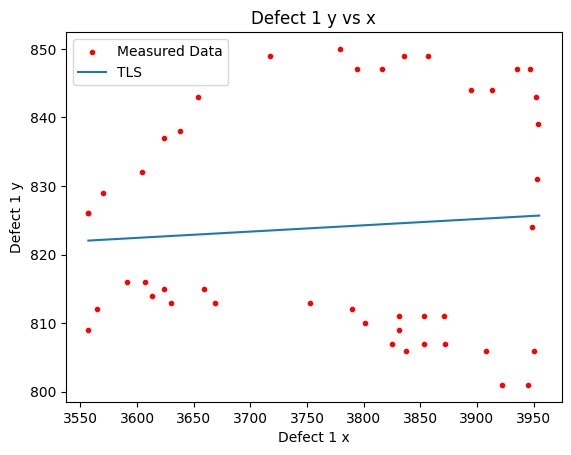

In [10]:
col2x = df['x']
col2x.dropna(inplace=True)
col2x = col2x[:len(col2x)-4]

col2y = df['y']
col2y.dropna(inplace=True)
col2y = col2y[:len(col2y)-4]

col2x = np.array(col2x, dtype='int')
col2y = np.array(col2y, dtype='int')

s1, i1 = TotalLinearRegression(col2x, col2y, "Defect 1 x", "Defect 1 y", "Defect 1 y vs x")
print(f"The slope of the first dataset is ", '{0:.4f}'.format(s1))

The above figure shows that as the slope of the regressed line is close to zero, hence, it means that the corrosion defect of the steel reinforcement bars is aligned horizontally. 

The slope of the second dataset is  0.9058


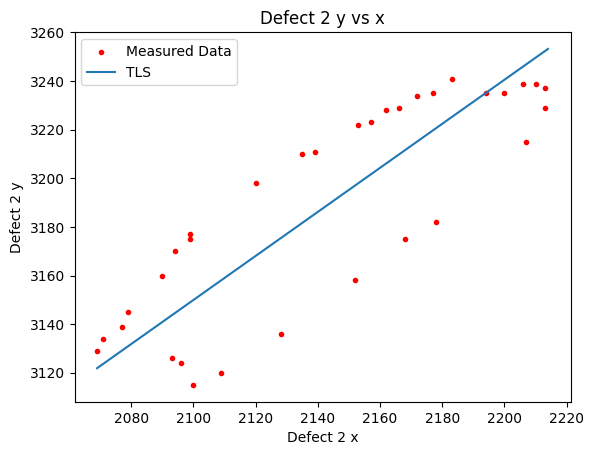

In [11]:
col2x = df['x.1']
col2x.dropna(inplace=True)
col2x = col2x[:len(col2x)-4]

col2y = df['y.1']
col2y.dropna(inplace=True)
col2y = col2y[:len(col2y)-4]

col2x = np.array(col2x, dtype='int')
col2y = np.array(col2y, dtype='int')

s2, i2 = TotalLinearRegression(col2x, col2y, "Defect 2 x", "Defect 2 y", "Defect 2 y vs x")
print(f"The slope of the second dataset is ", '{0:.4f}'.format(s2))

The above graph is neither aligned horizontally nor vertically. This is because the slope is almost close to 1, so it is of an in-between nature. 

The slope of the third dataset is  39.4560


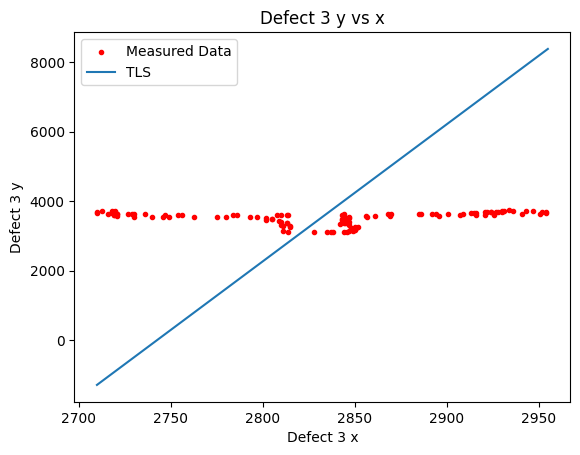

In [12]:
col2x = df['x.2']
col2x.dropna(inplace=True)
col2x = col2x[:len(col2x)-4]

col2y = df['y.2']
col2y.dropna(inplace=True)
col2y = col2y[:len(col2y)-4]

col2x = np.array(col2x, dtype='int')
col2y = np.array(col2y, dtype='int')

s3, i3 = TotalLinearRegression(col2x, col2y, "Defect 3 x", "Defect 3 y", "Defect 3 y vs x")
print(f"The slope of the third dataset is ", '{0:.4f}'.format(s3))

The data has a vertical defect as the angle is 88.54Â°. So, the slope is close to vertical. Hence, there is a vertical defect. 

### Defect 1 has a slope of 0.0092 hence it indicates a 'Horizontal Defect'. 
### Defect 2 has a slope of 0.9058 (close to 1) hence it indicates presence of 'Both - Vertical and Horizontal defects'. 
### Defect 3 has a slope of 39.4560 hence as it indicates a 'Vertical Defect'. 